# Market Data

Se muestra la tabla del precio de cada minuto del S&P 500.

In [1]:
from scripts import actidb 

In [2]:
QUERY = "SELECT * FROM market_data.nvda nvda ORDER BY nvda.ts;"

In [3]:
nvda = actidb.fetch(QUERY)

Conexión exitosa
Conexión cerrada


c:\Users\herie\GitHub\Apache Airflow 3.1.1 for HOCV Stocks with Yahoo Finance API\scripts\actidb.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(QUERY, conn)


In [26]:
print(nvda.shape)
nvda.tail(12)

(250, 6)


,ts,open,high,low,close,volume
238,2025-11-20 05:00:00+00:00,195.949997,196.000000,179.850006,180.639999,343504800
239,2025-11-21 05:00:00+00:00,181.240005,184.559998,172.929993,178.880005,346926200
240,2025-11-24 05:00:00+00:00,179.490005,183.500000,176.479996,182.550003,256618300
241,2025-11-25 05:00:00+00:00,174.910004,178.160004,169.550003,177.820007,320600300
242,2025-11-26 05:00:00+00:00,181.630005,182.910004,178.240005,180.259995,183852000
243,2025-11-28 05:00:00+00:00,179.009995,179.289993,176.500000,177.000000,121332800
244,2025-12-01 05:00:00+00:00,174.759995,180.300003,173.679993,179.919998,188131000
245,2025-12-02 05:00:00+00:00,181.759995,185.660004,180.000000,181.460007,182632200
246,2025-12-03 05:00:00+00:00,181.080002,182.449997,179.110001,179.589996,165138000
247,2025-12-04 05:00:00+00:00,181.619995,184.520004,179.960007,183.380005,167364900


# Actiestilo

In [5]:
import matplotlib.pyplot as plt
from scripts import actiestilo
import importlib
importlib.reload(actiestilo)
actiestilo.set_style()

In [6]:
import seaborn as sns
sns.color_palette()

[(0.01568627450980392, 0.11764705882352941, 0.25882352941176473),
 (0.7764705882352941, 0.7176470588235294, 0.5176470588235295),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

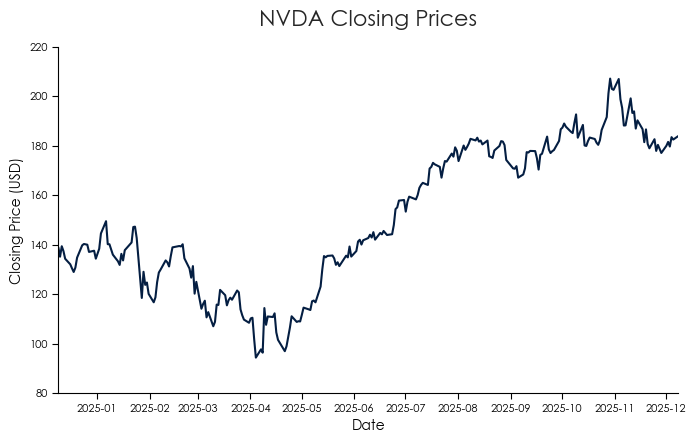

In [13]:
plt.figure()
plt.plot(nvda['ts'], nvda['close'])
plt.title('NVDA Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()

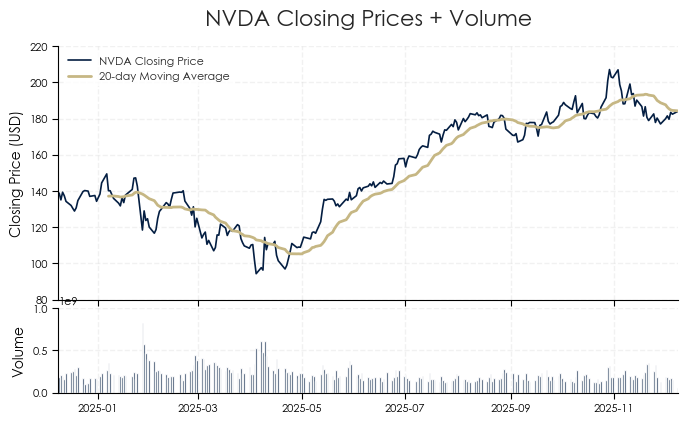

In [29]:
import matplotlib.pyplot as plt

# Ensure time is datetime and sorted
nvda = nvda.copy()
nvda["ts"] = pd.to_datetime(nvda["ts"])
nvda = nvda.sort_values("ts")

t = nvda["ts"]
p = nvda["close"]
v = nvda["volume"]
ma20 = p.rolling(window=20, min_periods=20).mean()

fig, (ax_price, ax_vol) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
)

# --- Price panel
ax_price.plot(t, p, label="NVDA Closing Price", linewidth=1.2)
ax_price.plot(t, ma20, label="20-day Moving Average", linewidth=2)
ax_price.set_title("NVDA Closing Prices + Volume")
ax_price.set_ylabel("Closing Price (USD)")
ax_price.grid(True, alpha=0.3)
ax_price.legend(loc="upper left")

# --- Volume "mesh" panel (dense bars)
ax_vol.bar(t, v, width=1, alpha=0.9)  # width=1 works well for daily data; adjust if intraday
ax_vol.set_ylabel("Volume")
ax_vol.grid(True, alpha=0.3)

plt.show()
